In [115]:
#import the neccessary libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from scipy import stats
nltk.download('vader_lexicon')
warnings.simplefilter("ignore")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tomil\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [116]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 0047-F845

 Directory of C:\Users\tomil\folders\archive (7)

04/02/2023  11:13    <DIR>          .
05/02/2023  00:07    <DIR>          ..
04/02/2023  11:13           219,768 gas_station_orig.jpg
04/02/2023  11:13            14,561 measurements.csv
04/02/2023  11:13            27,500 measurements2.xlsx
               3 File(s)        261,829 bytes
               2 Dir(s)  401,480,318,976 bytes free


In [117]:
cd archive (7)

[WinError 2] The system cannot find the file specified: 'archive (7)'
C:\Users\tomil\folders\archive (7)


In [118]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 0047-F845

 Directory of C:\Users\tomil\folders\archive (7)

04/02/2023  11:13    <DIR>          .
05/02/2023  00:07    <DIR>          ..
04/02/2023  11:13           219,768 gas_station_orig.jpg
04/02/2023  11:13            14,561 measurements.csv
04/02/2023  11:13            27,500 measurements2.xlsx
               3 File(s)        261,829 bytes
               2 Dir(s)  401,480,310,784 bytes free


In [119]:
#load dataset

df= pd.read_csv('measurements.csv')


In [120]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [121]:
df.info() #checking for the info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [122]:
df.columns# checking the columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')

In [123]:
df.shape# checking for the shape of the data

(388, 12)

In [124]:
# Check for the number of duplicated columns

df.duplicated().sum()

0

# DATA CLEANING

In [125]:
# Dropping columns that are not needed for analysis, because they got too many nan

df.drop(['specials', 'refill liters', 'refill gas'], inplace=True, axis=1)

In [126]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,"21,5",12,E10,0,0,0
1,12,"4,2",30,"21,5",13,E10,0,0,0
2,"11,2","5,5",38,"21,5",15,E10,0,0,0
3,"12,9","3,9",36,"21,5",14,E10,0,0,0
4,"18,5","4,5",46,"21,5",15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,SP98,0,0,0
384,"16,1","4,3",38,25,31,SP98,1,0,0
385,16,"3,8",45,25,19,SP98,0,0,0
386,"15,4","4,6",42,25,31,SP98,1,0,0


In [127]:
# Check the number of missing values
df.isna().sum()

distance         0
consume          0
speed            0
temp_inside     12
temp_outside     0
gas_type         0
AC               0
rain             0
sun              0
dtype: int64

#Since the number of missing values are not much, we can drop them

In [128]:
df.dropna(inplace=True)

In [129]:
df.describe()

,speed,temp_outside,AC,rain,sun
count,376.000000,376.000000,376.000000,376.00000,376.000000
mean,41.957447,11.340426,0.079787,0.12500,0.082447
std,13.714354,7.066999,0.271325,0.33116,0.275411
min,14.000000,-5.000000,0.000000,0.00000,0.000000
25%,32.000000,6.000000,0.000000,0.00000,0.000000
50%,40.500000,10.000000,0.000000,0.00000,0.000000
75%,50.000000,16.000000,0.000000,0.00000,0.000000
max,90.000000,31.000000,1.000000,1.00000,1.000000


In [130]:
## Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals
numerical= df.select_dtypes('number')
numerical

,speed,temp_outside,AC,rain,sun
0,26,12,0,0,0
1,30,13,0,0,0
2,38,15,0,0,0
3,36,14,0,0,0
4,46,15,0,0,0
...,...,...,...,...,...
383,39,18,0,0,0
384,38,31,1,0,0
385,45,19,0,0,0
386,42,31,1,0,0


In [131]:
categoricals=df.select_dtypes('object')
categoricals

,distance,consume,temp_inside,gas_type
0,28,5,"21,5",E10
1,12,"4,2","21,5",E10
2,"11,2","5,5","21,5",E10
3,"12,9","3,9","21,5",E10
4,"18,5","4,5","21,5",E10
...,...,...,...,...
383,16,"3,7","24,5",SP98
384,"16,1","4,3",25,SP98
385,16,"3,8",25,SP98
386,"15,4","4,6",25,SP98


<AxesSubplot:ylabel='Density'>

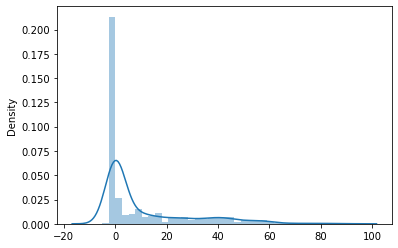

In [132]:
## Using seaborn library to construct distribution plots for the numerical variables
sns.distplot(numerical)

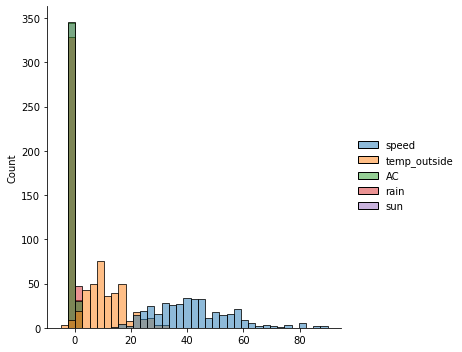

In [133]:
sns.displot(df)

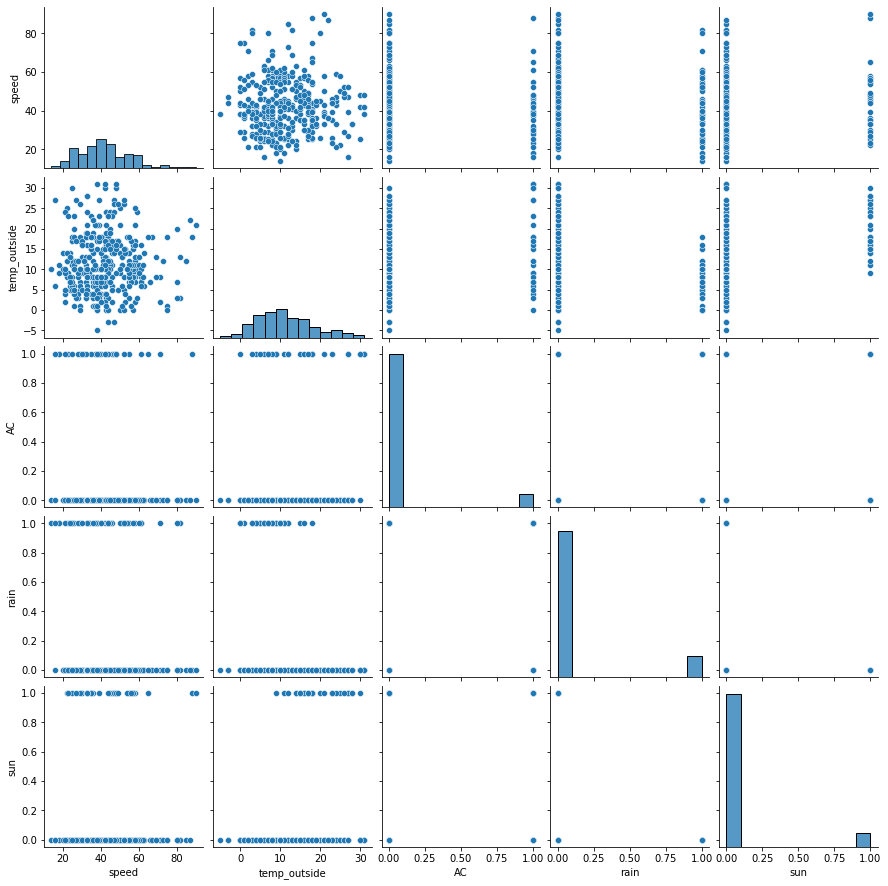

In [134]:
sns.pairplot(df)

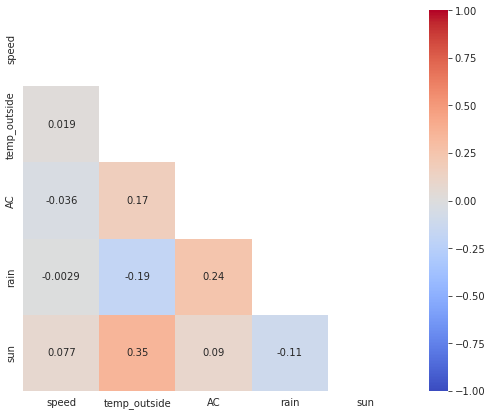

In [135]:
#Plot the Correlation Heatmap
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [136]:
#checking the multicollinearity between the features
numerical.corr()

,speed,temp_outside,AC,rain,sun
speed,1.000000,0.019327,-0.036351,-0.002936,0.077181
temp_outside,0.019327,1.000000,0.169374,-0.185731,0.349988
AC,-0.036351,0.169374,1.000000,0.244848,0.090164
rain,-0.002936,-0.185731,0.244848,1.000000,-0.113298
sun,0.077181,0.349988,0.090164,-0.113298,1.000000


In [138]:
X = pd.concat([numerical, categoricals], axis = 1)
X = X.drop(['gas_type'], axis = 1)
y = df['gas_type']
X

,speed,temp_outside,AC,rain,sun,distance,consume,temp_inside
0,26,12,0,0,0,28,5,"21,5"
1,30,13,0,0,0,12,"4,2","21,5"
2,38,15,0,0,0,"11,2","5,5","21,5"
3,36,14,0,0,0,"12,9","3,9","21,5"
4,46,15,0,0,0,"18,5","4,5","21,5"
...,...,...,...,...,...,...,...,...
383,39,18,0,0,0,16,"3,7","24,5"
384,38,31,1,0,0,"16,1","4,3",25
385,45,19,0,0,0,16,"3,8",25
386,42,31,1,0,0,"15,4","4,6",25


In [139]:
y

0       E10
1       E10
2       E10
3       E10
4       E10
       ... 
383    SP98
384    SP98
385    SP98
386    SP98
387    SP98
Name: gas_type, Length: 376, dtype: object

# Split Train and test data set

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=0)

In [142]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: '16,5'

In [ ]:
# i got stuck, i need to work more on my self, just had to submit since i was out of time.